# Country Economic Conditions for Cargo Carriers (Time Series Techniques)

This report is written from the point of view of a data scientist preparing a report to the Head of Analytics for a logistics company. The company needs information on economic and financial conditions is different countries, including data on their international trade, to be aware of any situations that could affect business.

## Objective

The objective of this report is to determine what factors may be driving investment in a country. For our company, it is important to understand the drivers of global growth and investment, as it allows us to plan ahead for where there may be greater demand for cargo services in the future. We want to positions ourselves as the go-to logistics company globally. Positioning ourselves in growing trade hubs will serve the long-term strategic objectives of our global services.

## Data Summary

This dataset is taken from the International Monetary Fund (IMF) data bank. It lists country-level economic and financial statistics from all countries globally. This includes data such as gross domestic product (GDP), inflation, exports and imports, and government borrowing and revenue. The data is given in either US Dollars, or local currency depending on the country and year. Some variables, like inflation and unemployment, are given as percentages.

## Data Exploration

In [11]:
#Import required packages
import numpy as np
import pandas as pd
from numpy import *
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

In [69]:
#Import IMF World Economic Outlook Data from GitHub
WEO = pd.read_csv('https://raw.githubusercontent.com/jamiemfraser/machine_learning/main/WEOApr2021all.csv')
WEO=pd.DataFrame(WEO)
WEO.head()

,CountryCode,Country,Indicator,Notes,Units,Scale,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AFG,Afghanistan,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,NaN,NaN,1.5,1.3,...,4.5,4.8,2.2,0.3,1.4,0.8,1.6,1.4,2.2,2.2
1,AFG,Afghanistan,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,NaN,NaN,33.9,29.6,...,29.4,26.6,10.9,1.4,6.6,3.8,9.0,7.6,12.2,11.7
2,ALB,Albania,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,-0.2,-0.2,-0.4,-0.4,...,-1.4,-1.7,-1.3,-1.2,-1.4,-1.0,-0.9,-1.0,-1.0,-1.2
3,ALB,Albania,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,-7.1,-6.3,-10.2,-7.7,...,-11.3,-12.9,-10.2,-9.3,-10.8,-8.6,-7.6,-7.5,-6.8,-8.0
4,DZA,Algeria,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,9.1,7.1,4.4,8.8,...,12.2,19.8,12.3,0.8,-9.4,-27.3,-26.5,-22.1,-16.7,-17.1


In [70]:
#For this analysis, we will specifically focus on economic conditions in the United States over time
WEOUSA=WEO[WEO.Country == 'United States']
WEOUSA.head()

,CountryCode,Country,Indicator,Notes,Units,Scale,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
370,USA,United States,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,-401.9,-394.1,-456.1,-522.3,...,-432.0,-455.3,-418.1,-336.9,-367.8,-407.4,-394.9,-365.3,-449.7,-480.2
371,USA,United States,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,-3.9,-3.7,-4.2,-4.6,...,-2.9,-2.9,-2.6,-2.0,-2.1,-2.2,-2.1,-1.9,-2.2,-2.2
575,USA,United States,Employment,Employment can be defined by either the nation...,Persons,Millions,136.9,136.9,136.5,137.7,...,139.1,139.9,142.5,143.9,146.3,148.8,151.4,153.3,155.8,157.5
955,USA,United States,General government net lending/borrowing,Net lending (+)/ borrowing (-) is calculated a...,National currency,Billions,NaN,-56.8,-416.9,-545.8,...,"-1,652.8","-1,508.1","-1,300.3",-766.0,-710.6,-643.0,-811.3,-902.2,"-1,115.2","-1,218.6"
956,USA,United States,General government net lending/borrowing,Net lending (+)/ borrowing (-) is calculated a...,Percent of GDP,NaN,NaN,-0.5,-3.8,-4.8,...,-11.0,-9.7,-8.0,-4.6,-4.1,-3.5,-4.3,-4.6,-5.4,-5.7


In [71]:
WEOUSA=pd.melt(WEOUSA, id_vars='Indicator', value_vars=['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], var_name='Year', value_name='Value')
WEOUSA=WEOUSA.reset_index()
WEOUSA.dropna(inplace=True)
WEOUSA

,index,Indicator,Year,Value
0,0,Current account balance,2000,-401.9
1,1,Current account balance,2000,-3.9
2,2,Employment,2000,136.9
9,9,"Gross domestic product per capita, constant pr...",2000,"46,514.9"
10,10,"Gross domestic product per capita, constant pr...",2000,"50,101.1"
...,...,...,...,...
435,435,"Inflation, average consumer prices",2019,1.8
436,436,Total investment,2019,21.0
437,437,Unemployment rate,2019,3.7
438,438,Volume of exports of goods and services,2019,-0.1


In [72]:
WEOUSA.dtypes

index          int64
Indicator     object
Year          object
Value        float64
dtype: object

In [85]:
WEOUSA['Year']=pd.to_datetime(WEOUSA['Year'])
WEOUSA.dtypes

index                 int64
Indicator            object
Year         datetime64[ns]
Value               float64
dtype: object

In [86]:
WEOUSA.Indicator.unique()

array(['Current account balance', 'Employment',
       'Gross domestic product per capita, constant prices',
       'Gross domestic product per capita, current prices',
       'Gross domestic product, constant prices',
       'Inflation, average consumer prices', 'Total investment',
       'Unemployment rate', 'Volume of exports of goods and services',
       'Volume of imports of goods and services',
       'General government net lending/borrowing',
       'General government revenue',
       'General government total expenditure'], dtype=object)

In [95]:
USAInvest=WEOUSA[WEOUSA.Indicator=='Total investment']
USAInvest.dtypes

index                 int64
Indicator            object
Year         datetime64[ns]
Value               float64
dtype: object

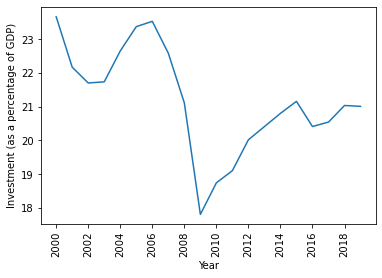

In [88]:
plt.plot(USAInvest.Year, USAInvest.Value)
plt.xlabel('Year')
plt.ylabel('Investment (as a percentage of GDP)')
plt.xticks(rotation='vertical')
plt.show()

## Time Series Models

The three models that I will use for this analysis are

1. Stationarity
2. ARMA Model
3. ARIMA Model

### Model 1: Stationarity

Daily data Autocorrelation Plots


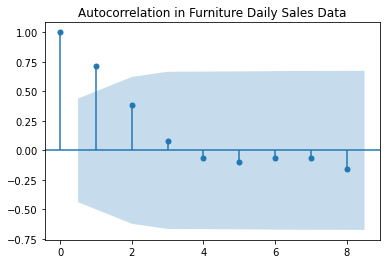

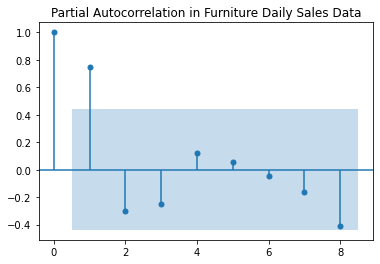

In [100]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

#Print Autocorrelation and Partial Autocorrelation plots
print('Daily data Autocorrelation Plots')
acf_plot = plot_acf(USAInvest['Value'], lags=8, title='Autocorrelation in Furniture Daily Sales Data')
pacf_plot = plot_pacf(USAInvest['Value'], lags=8, title='Partial Autocorrelation in Furniture Daily Sales Data')

#Results show a significant lag of 1 for both autocorrelation and partial autocorrelation

In [101]:
#Calculate and print test statistics to determine stationarity

import sys, os
import statsmodels as ss
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(USAInvest.Value)
print(adf)

-13.456192854581152


In [102]:
print(pvalue)

##pvalue is <0.05, so can conclude that the series is stationary at the 95% confidence level 

3.603404479161982e-25


### Model 2: ARMA Model

In [105]:
# Find model parameters, using the significant lag values of p=1 for the AR part and q=1 for the MA part
model = sm.tsa.ARMA(USAInvest.Value, (1, 1)).fit(trend='nc', disp=0)
model.params

ar.L1.Value   1.0
ma.L1.Value   0.2
dtype: float64

### Model 3: ARIMA Model

In [107]:
USAInvest.Value.diff()

18     NaN
40    -1.5
62    -0.5
84     0.0
106    0.9
128    0.7
150    0.2
172   -0.9
194   -1.5
216   -3.3
238    0.9
260    0.4
282    0.9
304    0.4
326    0.4
348    0.4
370   -0.7
392    0.1
414    0.5
436   -0.0
Name: Value, dtype: float64

Text(0.5, 1.0, 'Second Difference')

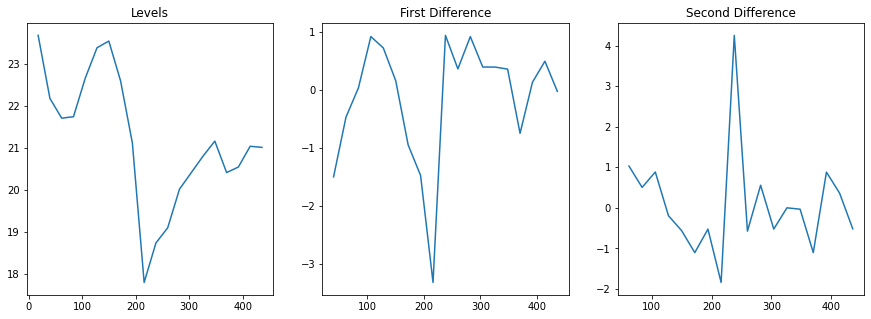

In [108]:
fig,axes = plt.subplots(1,3,figsize = (15,5))
axes[0].plot(USAInvest.Value)
axes[0].set_title('Levels')
axes[1].plot(USAInvest.Value.diff())
axes[1].set_title('First Difference')
axes[2].plot(USAInvest.Value.diff().diff())
axes[2].set_title('Second Difference')

In [110]:
# Find model parameters, using the significant lag values of p=1 for the AR part and q=1 for the MA part
model = sm.tsa.ARIMA(USAInvest.Value, (1, 1, 1)).fit(trend='nc', disp=0)
model.params

ar.L1.D.Value   0.2
ma.L1.D.Value   0.1
dtype: float64

### Recommendation

For the purposes of this study, I would recommend using an ARIMA model with p=1, d=1, and q=1.

## Key Findings

Investment data for the USA between the years of 2000 and 2019 is stationary, and therefore easy to model using time series techniques. After examining the autocorrelation and partial autocorrelation graphs, and testing different orders of differencing, it was determined that there is a autoregressive process at lag 1 and a moving average process of lag 1.

## Next Steps

This data covers a limited time period. To make the findings more robust, I would repeat the analysis with a longer time period of data, perhaps covering several decades of investment data.